<a href="https://colab.research.google.com/github/TejusM/hotelbooking-data-analysis-/blob/main/tej_hotel_booking.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Have you ever wondered when the best time of year to book a hotel room is? Or the optimal length of stay in order to get the best daily rate? What if you wanted to predict whether or not a hotel was likely to receive a disproportionately high number of special requests? This hotel booking dataset can help you explore those questions!

## <b>This data set contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things. All personally identifying information has been removed from the data. </b>

## <b> Explore and analyze the data to discover important factors that govern the bookings. </b>

In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mtick
%matplotlib inline

#To display maxium columns of the dataset
pd.options.display.max_columns = None

In [49]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [50]:
data=pd.read_csv('/content/drive/MyDrive/Hotel Bookings.csv')

In [51]:
## Show the first 5 rows of Data
data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [52]:
data.tail()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
119385,City Hotel,0,23,2017,August,35,30,2,5,2,0.0,0,BB,BEL,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,0.0,0,BB,FRA,Online TA,TA/TO,0,0,0,E,E,0,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,0.0,0,BB,DEU,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07
119389,City Hotel,0,205,2017,August,35,29,2,7,2,0.0,0,HB,DEU,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,9.0,NaN,0,Transient,151.20,0,2,Check-Out,2017-09-07


In [53]:
 data.shape
 

(119390, 32)

The dataset has 119390 rows and 32 columns

#**Cleaning the dataset**

**1) Droping the duplicate values**

In [54]:
data[data.duplicated()].shape

(31994, 32)

In [55]:
data.drop_duplicates(inplace = True)

**2) Finding the null values**

In [56]:
data.isnull().sum().sort_values(ascending=False)[:12]


company                   82137
agent                     12193
country                     452
children                      4
reserved_room_type            0
assigned_room_type            0
booking_changes               0
deposit_type                  0
hotel                         0
previous_cancellations        0
days_in_waiting_list          0
customer_type                 0
dtype: int64

In the dataset 4 features has null values(i.e company, agent, country, children)

**3) Replacing the null values**

**a)** Replace the null values of company and agent with the Zero as they contain the id_number

In [57]:
data[['agent','company']] = data[['agent','company']].fillna(0.0)


**b)** Replace the missing values in the country column with mode

In [58]:
data['country'].fillna(data.country.mode().to_string(), inplace=True)

**c)** Replace the missing values in the children column with the rounded mean value

In [59]:
data['children'].fillna(round(data.children.mean()), inplace=True)

In [60]:
data.isnull().sum().sort_values(ascending=False)[:12]

hotel                          0
is_canceled                    0
reservation_status             0
total_of_special_requests      0
required_car_parking_spaces    0
adr                            0
customer_type                  0
days_in_waiting_list           0
company                        0
agent                          0
deposit_type                   0
booking_changes                0
dtype: int64

Droping the rows that have zero guests including adults, children and babies.

In [61]:
data = data.drop(data[(data.adults+data.babies+data.children)==0].index)

In [62]:
data[data['adults']+data['babies']+data['children'] == 0].shape

(0, 32)

***Converting the datatypes***

In [63]:
data.dtypes

hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
agent                             

We see different data types for different columns.There are some columns like children, company, and agent, that are float type but their values are only in integers.
So convert them to the integer type.

In [64]:
data[['children', 'company', 'agent']] = data[['children', 'company', 'agent']].astype('int64')

In [65]:
# changing 'reservation_status_date' to data_type.
data['reservation_status_date'] = pd.to_datetime(data['reservation_status_date'], format = '%Y-%m-%d')


**4) Grouping the multiple columns into one column**

In [66]:
#Adding total staying days in hotels
data['total_stay'] = data['stays_in_weekend_nights']+data['stays_in_week_nights']

In [67]:
#adding total people number as column.
data['total_people'] = data['adults']+data['children']+data['babies']

In [68]:
data.dtypes

hotel                                     object
is_canceled                                int64
lead_time                                  int64
arrival_date_year                          int64
arrival_date_month                        object
arrival_date_week_number                   int64
arrival_date_day_of_month                  int64
stays_in_weekend_nights                    int64
stays_in_week_nights                       int64
adults                                     int64
children                                   int64
babies                                     int64
meal                                      object
country                                   object
market_segment                            object
distribution_channel                      object
is_repeated_guest                          int64
previous_cancellations                     int64
previous_bookings_not_canceled             int64
reserved_room_type                        object
assigned_room_type  

**EDA**

In [69]:
num_data = data[['lead_time','previous_cancellations','previous_bookings_not_canceled','booking_changes','days_in_waiting_list','adr','required_car_parking_spaces','total_of_special_requests','total_stay','total_people']]


Correlation for non numeric type categories 

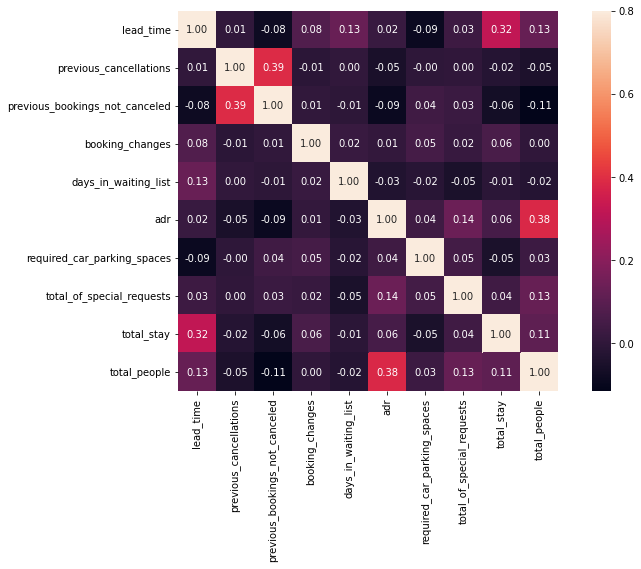

In [70]:
corrmat = num_data.corr()
f, ax = plt.subplots(figsize=(12, 7))
sns.heatmap(corrmat,annot = True,fmt='.2f', annot_kws={'size': 10},  vmax=.8, square=True);

 Total stay length and lead time have slight correlation.
 adr is slightly correlated with total_people.
 

Lets see does length of stay affects the adr which are less than 5000.

In [71]:
data.drop(data[data['adr'] > 5000].index, inplace = True)

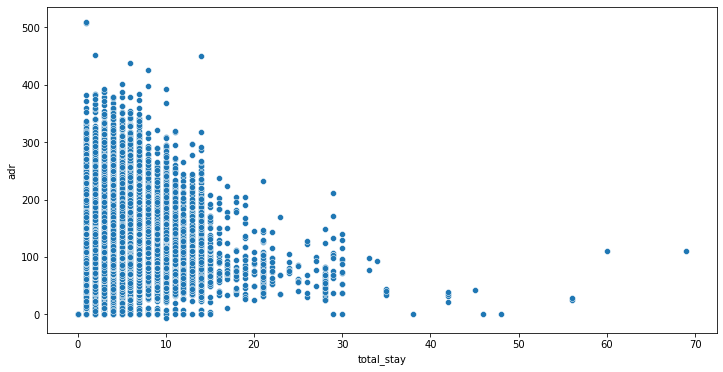

In [72]:
plt.figure(figsize = (12,6))
sns.scatterplot(y = 'adr', x = 'total_stay', data = data)
plt.show()

According to the above scatter plot as length of total_stay increases the adr decreases. This means for longer stay, there will be better deal for the customer.

#**{1} Percentage of booking in hotel**

**a)** Hotel that has more bookings:

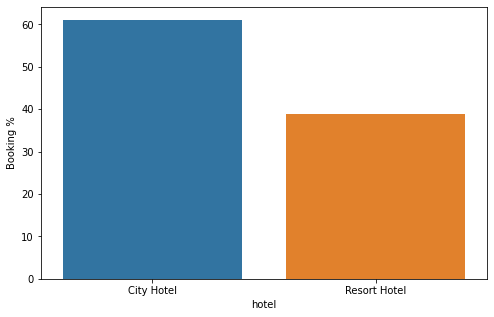

In [73]:
grouped_by_hotel = data.groupby('hotel')
d1 = pd.DataFrame((grouped_by_hotel.size()/data.shape[0])*100).reset_index().rename(columns = {0:'Booking %'})      
plt.figure(figsize = (8,5))
sns.barplot(x = d1['hotel'], y = d1['Booking %'] )
plt.show()

**City Hotel**(60%) has more booking than the Resort Hotel

**b)** Revenue collected by the hotel:

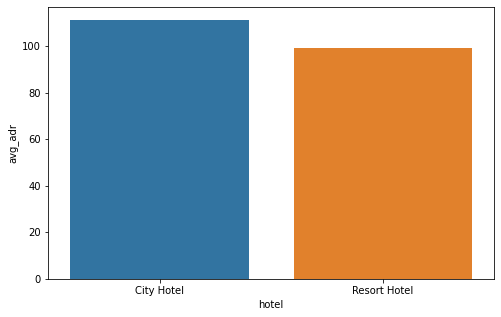

In [74]:
d3 = grouped_by_hotel['adr'].agg(np.mean).reset_index().rename(columns = {'adr':'avg_adr'})   
plt.figure(figsize = (8,5))
sns.barplot(x = d3['hotel'], y = d3['avg_adr'] )
plt.show()

**city hotel** has more revenue then resort hotel.

**c)** The calculated stay length in each hotel:

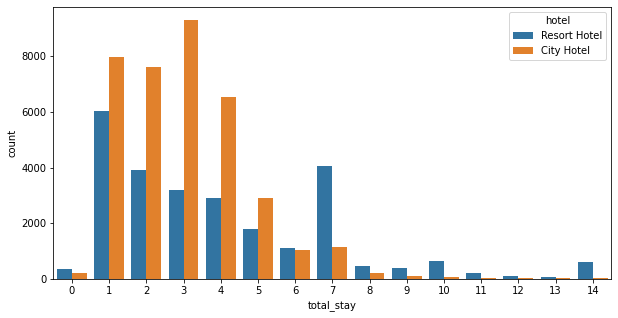

In [75]:
not_canceled = data[data['is_canceled'] == 0]
s1 = not_canceled[not_canceled['total_stay'] < 15]
plt.figure(figsize = (10,5))
sns.countplot(x = s1['total_stay'], hue = s1['hotel'])
plt.show()

The average stay period is less than 4 days and generally people prefer **City Hotel** for short stay, but for long stays, **Resort Hotel** is preferred.

**d)** Hotel that has higher bookings cancellation rate 

In [29]:
cancelled_data = data[data['is_canceled'] == 1]
cancel_grp = cancelled_data.groupby('hotel')
D1 = pd.DataFrame(cancel_grp.size()).rename(columns = {0:'total_cancelled_bookings'})

grouped_by_hotel = data.groupby('hotel')
total_booking = grouped_by_hotel.size()
D2 = pd.DataFrame(total_booking).rename(columns = {0: 'total_bookings'})
D3 = pd.concat([D1,D2], axis = 1)
D3['cancel_%'] = round((D3['total_cancelled_bookings']/D3['total_bookings'])*100,2)
D3

,total_cancelled_bookings,total_bookings,cancel_%
hotel,,,
City Hotel,33078,79162,41.79
Resort Hotel,11120,40047,27.77


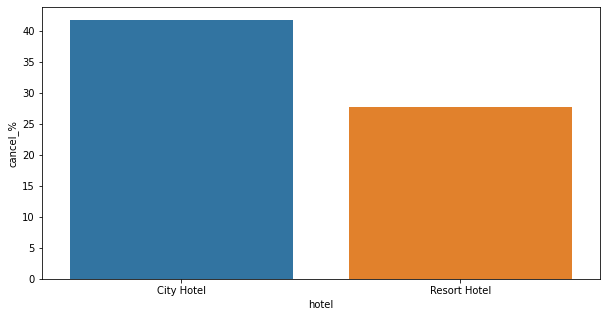

In [30]:
plt.figure(figsize = (10,5))
sns.barplot(x = D3.index, y = D3['cancel_%'])
plt.show()

**City Hotel** has more cancel_% than the Resort Hotel

# **{2}Month that has maximum booking**

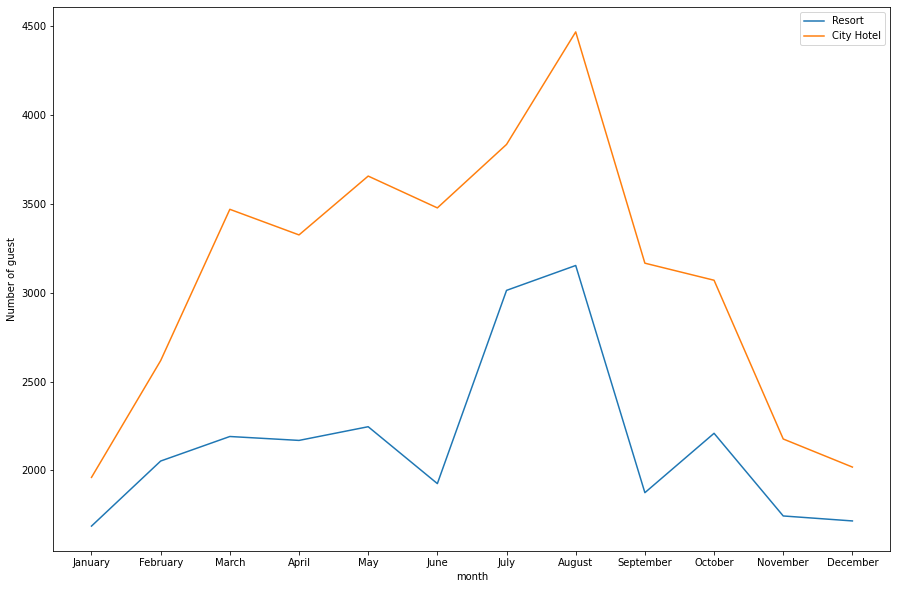

In [76]:
data_month = data['arrival_date_month'].value_counts().reset_index()
data_month.columns=['months','Number of guests']
data_month
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
data_month['months'] = pd.Categorical(data_month['months'], categories=months, ordered=True)
data_month.sort_values('months').reset_index()


data_resort = data[(data['hotel'] == 'Resort Hotel') & (data['is_canceled'] == 0)]
data_city = data[(data['hotel'] == 'City Hotel') & (data['is_canceled'] == 0)]
resort_hotel = data_resort.groupby(['arrival_date_month'])['adr'].mean().reset_index()
city_hotel=data_city.groupby(['arrival_date_month'])['adr'].mean().reset_index()
final_hotel = resort_hotel.merge(city_hotel, on = 'arrival_date_month')
final_hotel.columns = ['month', 'price_for_resort', 'price_for_city_hotel']
final_hotel

resort_guest = data_resort['arrival_date_month'].value_counts().reset_index()
resort_guest.columns=['month','no of guests']
resort_guest

city_guest = data_city['arrival_date_month'].value_counts().reset_index()
city_guest.columns=['month','no of guests']
city_guest

final_guest=resort_guest.merge(city_guest, on = 'month')
final_guest.columns=['month','no of guests in resort','no of guest in city hotel']
final_guest
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
final_guest['month'] = pd.Categorical(final_guest['month'], categories=months, ordered=True)
final_guest = final_guest.sort_values('month').reset_index()

sns.lineplot(data=final_guest, x='month', y='no of guests in resort')
sns.lineplot(data=final_guest, x='month', y='no of guest in city hotel')
plt.legend(['Resort','City Hotel'])
plt.ylabel('Number of guest')
fig = plt.gcf()
fig.set_size_inches(15,10)

**August** has the more number of the visitors/guests for both City and Resort Hotels

#**{3}The room type prefered by the guests**

**a)** Which room type is in most demand and has high adr?

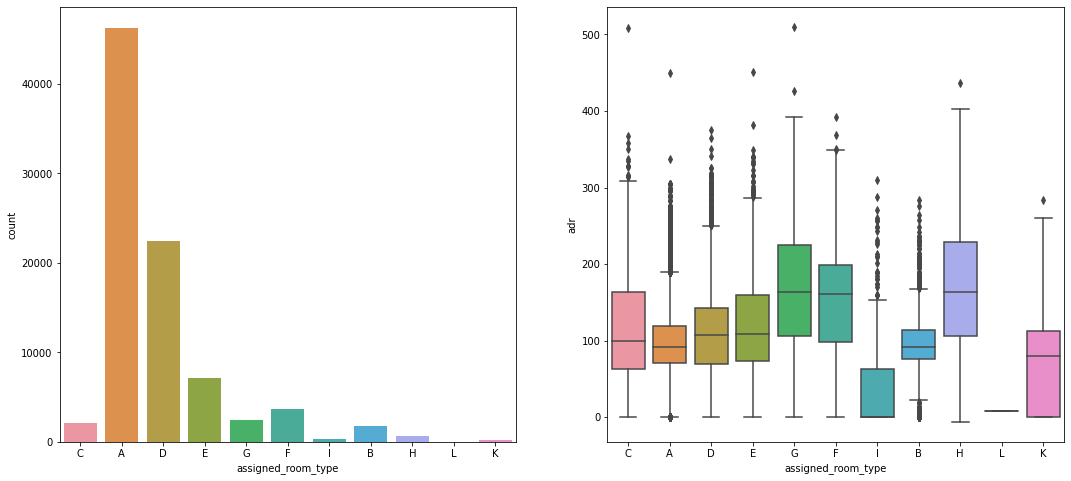

In [77]:
fig, axes = plt.subplots(1, 2, figsize=(18, 8))

grp_by_room = data.groupby('assigned_room_type')
data['Num_of_bookings'] = grp_by_room.size()

sns.countplot(ax = axes[0], x = data['assigned_room_type'])
sns.boxplot(ax = axes[1], x = data['assigned_room_type'], y = data['adr'])
plt.show()

The room type **A** is in more demand than that of all the hotel types and hotel type **H** has high adr value compared to all 